#### Simulation: Different spatial patterns to understand behavior of TDA adjacency method

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 100
GRID_SIZE = 7

# Set the random seed
np.random.seed(0)
RANDOM_SEED_LIST = np.random.randint(0, 1000, NUM_OF_ITERATIONS)

# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML','Value'])


for iter in range(NUM_OF_ITERATIONS):
    print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    gdf_none = generate_grid_dataframe(GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)        # No spatial correlation
    gdf_positive = generate_grid_dataframe(GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED) 
    gdf_negative = generate_grid_dataframe(GRID_SIZE, autocorrelation="negative", random_seed=RANDOM_SEED)

    # Calculate Moran’s I
    moran_none = calculate_moran_i(gdf_none, GRID_SIZE)
    moran_positive = calculate_moran_i(gdf_positive, GRID_SIZE)
    moran_negative = calculate_moran_i(gdf_negative, GRID_SIZE)

    for gdf in [gdf_none, gdf_positive, gdf_negative]:
        for filter_method in ['up', 'down']:
        
            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = None, filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            # sum of the Value variable
            sum_value = filtered_df['Value'].sum()


            total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')

            if filter_method == 'up' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_negative:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'negative', 'Moran I': moran_negative, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_negative:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'negative', 'Moran I': moran_negative, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 0
Iteration: 1


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_20701/3712253759.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73


In [3]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,-0.118465,up,48,25.020693,0.521264,12.510346,0.260632
1,0,684,none,-0.118465,down,48,18.143892,0.377998,9.071946,0.188999
2,0,684,positive,0.652255,up,49,25.049959,0.511224,12.524979,0.255612
3,0,684,positive,0.652255,down,49,24.666337,0.503395,12.333168,0.251697
4,0,684,negative,-0.829894,up,48,24.259834,0.505413,12.129917,0.252707


In [61]:
results_df['TL'].values[0]

25.877539856019666

In [65]:
# create a empty df to store the results
test_df = pd.DataFrame(columns=['Iteration', 'Filter Method', 'TL Positive AC', 'TML Positive AC', 'TL none AC', 'TML none AC', 'Value'])

for ite in range(NUM_OF_ITERATIONS):
    temp_df_up = results_df[(results_df['Iteration'] == ite) & (results_df['Filter Method'] == 'up')]

    value = temp_df_up['Value'].values[0]

    temp_df_up_positive = temp_df_up[temp_df_up['Autocorrlation'] == 'positive']
    temp_df_up_none = temp_df_up[temp_df_up['Autocorrlation'] == 'none']

    TL_positive_AC_up = temp_df_up_positive['TL'].values[0]
    TML_positive_AC_up = temp_df_up_positive['TML'].values[0]
    TL_none_AC_up = temp_df_up_none['TL'].values[0]
    TML_none_AC_up = temp_df_up_none['TML'].values[0]



    temp_df_down = results_df[(results_df['Iteration'] == ite) & (results_df['Filter Method'] == 'down')]
    temp_df_down_positive = temp_df_down[temp_df_down['Autocorrlation'] == 'positive']
    temp_df_down_none = temp_df_down[temp_df_down['Autocorrlation'] == 'none']

    TL_positive_AC_down = temp_df_down_positive['TL'].values[0]
    TML_positive_AC_down = temp_df_down_positive['TML'].values[0]
    TL_none_AC_down = temp_df_down_none['TL'].values[0]
    TML_none_AC_down = temp_df_down_none['TML'].values[0]

    new_row = pd.DataFrame([{'Iteration': ite, 'Filter Method': 'up', 'TL Positive AC': TL_positive_AC_up, 'TML Positive AC': TML_positive_AC_up, 'TL none AC': TL_none_AC_up, 'TML none AC': TML_none_AC_up, 'Value': value}])

    test_df = pd.concat([test_df, new_row], ignore_index=True)

    new_row = pd.DataFrame([{'Iteration': ite, 'Filter Method': 'down', 'TL Positive AC': TL_positive_AC_down, 'TML Positive AC': TML_positive_AC_down, 'TL none AC': TL_none_AC_down, 'TML none AC': TML_none_AC_down, 'Value': value}])

    test_df = pd.concat([test_df, new_row], ignore_index=True)

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_20701/1296442910.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, new_row], ignore_index=True)


In [66]:
test_df

,Iteration,Filter Method,TL Positive AC,TML Positive AC,TL none AC,TML none AC,Value
0,0,up,25.049959,12.524979,25.877540,12.938770,24.998662
1,0,down,24.666337,12.333168,18.662090,9.331045,24.998662
2,1,up,25.858567,12.929284,26.648568,13.324284,25.704271
3,1,down,24.900388,12.450194,20.450556,10.225278,25.704271
4,2,up,24.070011,12.035005,24.996716,12.498358,23.916460
...,...,...,...,...,...,...,...
195,97,down,24.029280,12.014640,16.731640,8.365820,24.904864
196,98,up,27.463950,13.731975,28.436079,14.218040,27.335214
197,98,down,26.463804,13.231902,19.837949,9.918975,27.335214
198,99,up,24.559889,12.279945,25.799617,12.899809,24.445776


In [69]:
# filter by filter method
temp_df_up = test_df[test_df['Filter Method'] == 'up']

temp_df_down = test_df[test_df['Filter Method'] == 'down']
temp_df_down = temp_df_down[temp_df_down['Iteration'].isin([0,1,2,3,4,5,6,7,8,9])]

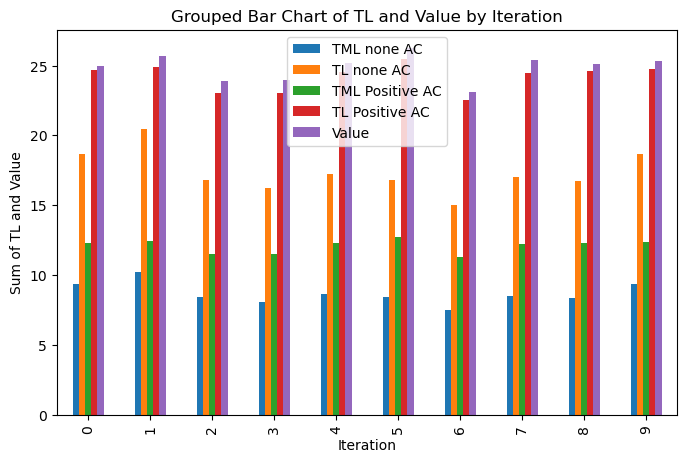

In [70]:
temp_df_down.groupby('Iteration')[['TML none AC','TL none AC','TML Positive AC','TL Positive AC', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")
plt.show()

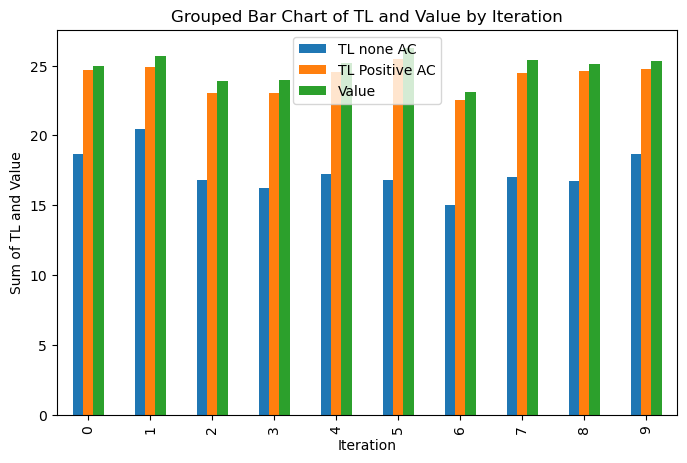

In [71]:
temp_df_down.groupby('Iteration')[['TL none AC','TL Positive AC', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")
plt.show()

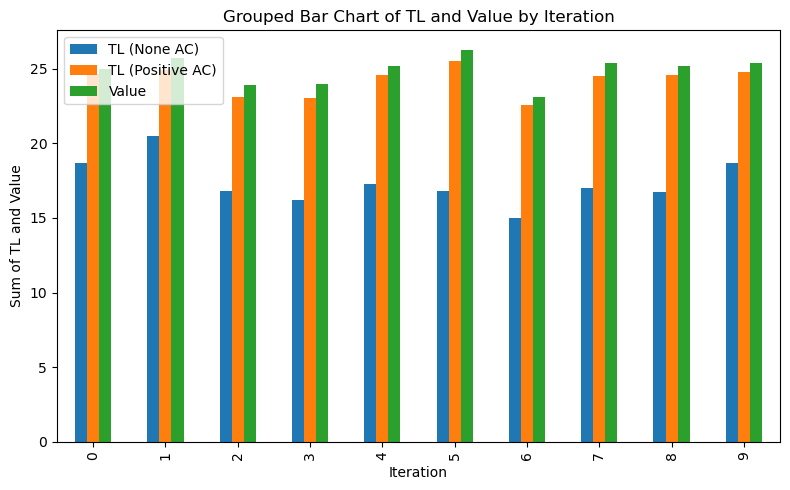

In [72]:
import matplotlib.pyplot as plt

# Group and sum
grouped_df = temp_df_down.groupby('Iteration')[['TL none AC','TL Positive AC', 'Value']].sum()

# Rename columns (dictionary key = old name, value = new name)
grouped_df = grouped_df.rename(columns={
    'TL none AC': 'TL (None AC)',
    'TL Positive AC': 'TL (Positive AC)'
    # 'Value': 'Value'  # If you also want to rename 'Value', do it here
})

# Plot
ax = grouped_df.plot(
    kind='bar',
    figsize=(8, 5)
)
plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


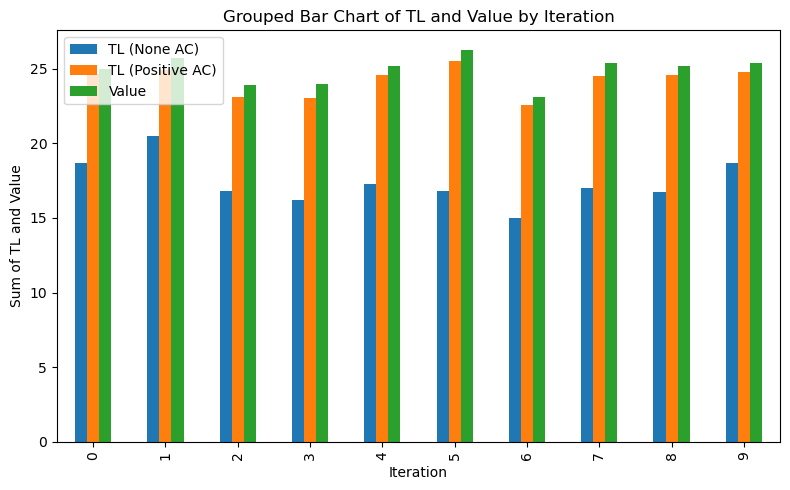

In [77]:
import matplotlib.pyplot as plt

ax = temp_df_down.groupby('Iteration')[['TL none AC','TL Positive AC', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")

# Get the current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Provide custom labels in the same order the columns appear
new_labels = ['TL (None AC)', 'TL (Positive AC)', 'Value']


# After creating your plot:
handles, labels = ax.get_legend_handles_labels()

# 2) Or, for more fine-grained positioning, use bbox_to_anchor:
ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0.5))

ax.legend(handles, new_labels)

plt.tight_layout()
plt.show()


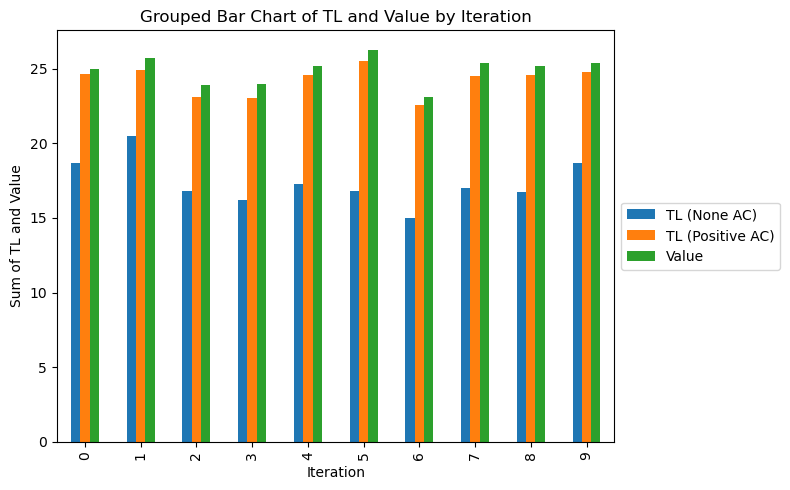

In [78]:
import matplotlib.pyplot as plt

# Create the bar chart
ax = temp_df_down.groupby('Iteration')[['TL none AC','TL Positive AC', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

# Label axes and add a title
plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")

# Get handles & labels once
handles, labels = ax.get_legend_handles_labels()

# Provide custom labels in the same order as the columns
new_labels = ['TL (None AC)', 'TL (Positive AC)', 'Value']

# Set legend with new labels and desired position
# Here, 'center left' with bbox_to_anchor=(1, 0.5) places the legend
# outside the plot to the right, vertically centered
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [55]:
# create a empty df to store the results
test_df = pd.DataFrame(columns=['Iteration', 'Filter Method', 'TL Positive AC', 'TML Positive AC', 'TL none AC', 'TML none AC', 'Value'])

# loop through the results_df
for row in results_df.iterrows():
    row = row[1]
    iteration = row['Iteration']
    filter_method = row['Filter Method']
    value = row['Value']

    

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_20701/2940327219.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, new_row], ignore_index=True)
/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_20701/2940327219.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, new_row], ignore_index=True)
/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_20701/2940327219.py:13: FutureWarning: The behavior of DataFrame 

In [56]:
test_df

,Iteration,Filter Method,TL Positive AC,TML Positive AC,TL none AC,TML none AC,Value
0,0,up,NaN,NaN,25.877540,12.938770,24.998662
1,0,down,NaN,NaN,18.662090,9.331045,24.998662
2,0,up,25.049959,12.524979,NaN,NaN,24.998662
3,0,down,NaN,NaN,24.666337,12.333168,24.998662
4,1,up,NaN,NaN,26.648568,13.324284,25.704271
...,...,...,...,...,...,...,...
395,98,down,NaN,NaN,26.463804,13.231902,27.335214
396,99,up,NaN,NaN,25.799617,12.899809,24.445776
397,99,down,NaN,NaN,16.255549,8.127774,24.445776
398,99,up,24.559889,12.279945,NaN,NaN,24.445776


In [47]:
#save the results to a csv file
results_df.to_csv('results.csv', index=False)


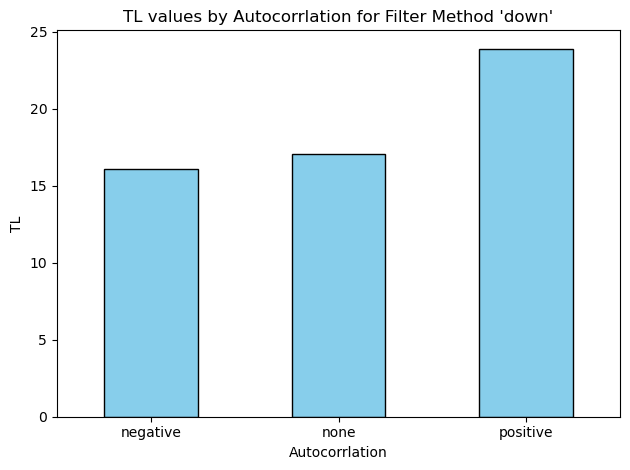

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for Filter Method "down"
df_down = results_df[results_df["Filter Method"] == "down"]

# If you have multiple rows with the same Autocorrlation, you might want to compute the average TL value.
# For this example, we'll group by "Autocorrlation" and take the mean of TL.
grouped_tl = df_down.groupby("Autocorrlation")["TL"].mean()

# Plot a bar chart comparing TL values by Autocorrlation
grouped_tl.plot(kind="bar", color='skyblue', edgecolor='black')

plt.xlabel("Autocorrlation")
plt.ylabel("TL")
plt.title("TL values by Autocorrlation for Filter Method 'down'")
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.tight_layout()
plt.show()

In [45]:
temp = results_df[results_df['Filter Method'] == 'down']
temp = temp[temp['Autocorrlation'] == 'none']
temp = temp[temp['Iteration'].isin([0,1,2,3,4,5,6,7,8,9])]
# temp = temp[temp['Iteration'].isin([0,1])]

In [20]:
temp

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Value
1,0,684,none,-0.118465,down,49,18.662090,0.380859,9.331045,0.190429,24.998662
3,0,684,positive,0.652255,down,49,24.666337,0.503395,12.333168,0.251697,24.998662
5,0,684,negative,-0.829894,down,49,15.258478,0.311398,7.629239,0.155699,24.084739
7,1,559,none,0.016440,down,49,20.450556,0.417358,10.225278,0.208679,25.704271
9,1,559,positive,0.894799,down,49,24.900388,0.508171,12.450194,0.254086,25.704271
11,1,559,negative,-0.871978,down,49,15.979404,0.326110,7.989702,0.163055,24.698009


In [29]:
type(temp['Value'][1])

numpy.float64

In [30]:
temp['Value'][1]

24.99866202310132

<Axes: xlabel='Iteration'>

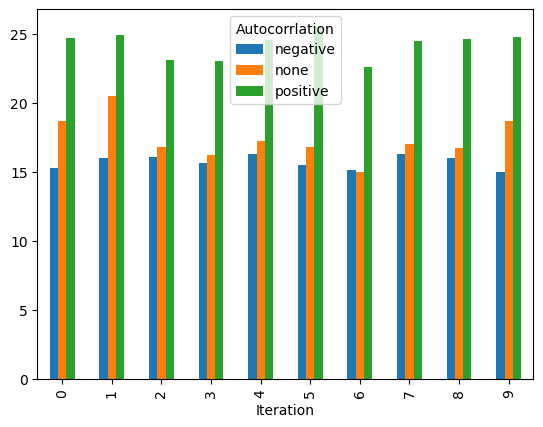

In [40]:
temp.groupby(['Iteration','Autocorrlation']).sum().unstack().plot(kind='bar',y='TL')



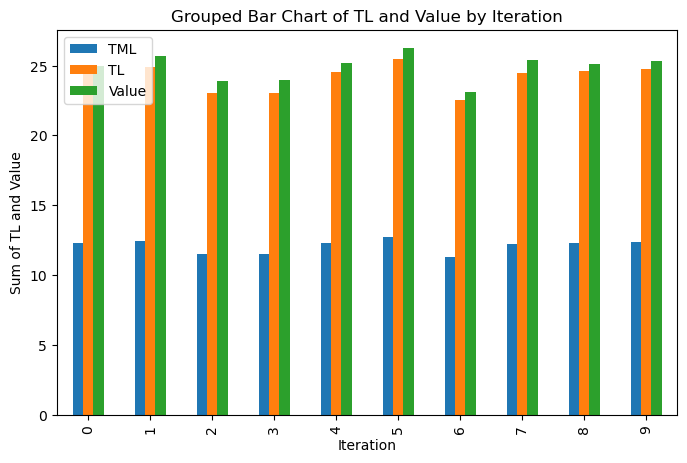

In [44]:
# # temp.groupby(['Iteration']).sum().unstack().plot(kind='bar',y=['TL','Value'])
# temp.groupby('Iteration').sum().unstack().plot(kind='bar',y='TL')
# temp.groupby(['Iteration']).sum().unstack().plot(kind='bar',y=['TL','Value'])

# Sum TL and Value by Iteration, then plot them as a grouped bar chart
temp.groupby('Iteration')[['TML','TL', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")
plt.show()


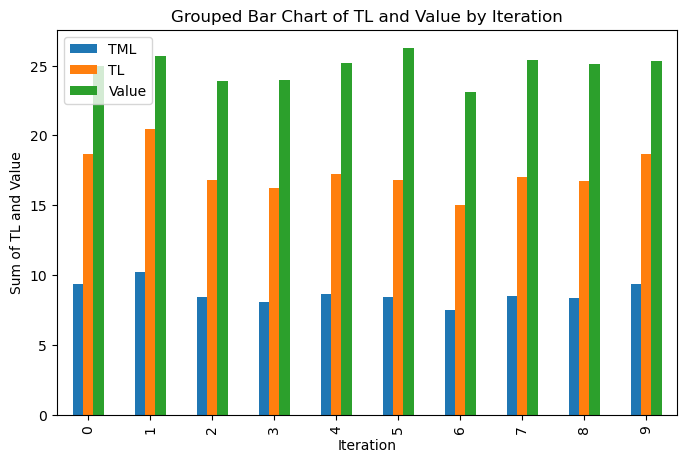

In [46]:
# # temp.groupby(['Iteration']).sum().unstack().plot(kind='bar',y=['TL','Value'])
# temp.groupby('Iteration').sum().unstack().plot(kind='bar',y='TL')
# temp.groupby(['Iteration']).sum().unstack().plot(kind='bar',y=['TL','Value'])

# Sum TL and Value by Iteration, then plot them as a grouped bar chart
temp.groupby('Iteration')[['TML','TL', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Grouped Bar Chart of TL and Value by Iteration")
plt.show()


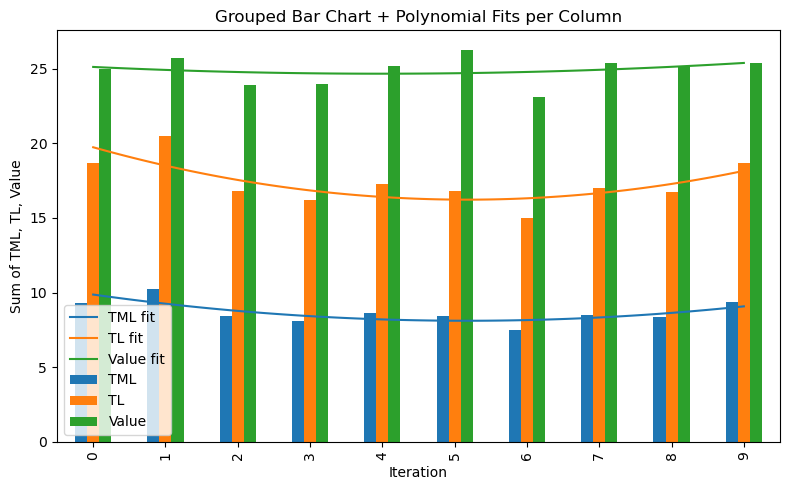

In [51]:
# 1) Group by Iteration and sum the selected columns
df_summed = temp.groupby('Iteration')[['TML','TL','Value']].sum()

# 2) Create the grouped bar chart
ax = df_summed.plot(kind='bar', figsize=(8, 5))

# 3) Fit and plot a polynomial curve for each column
#    We'll treat iteration indices (0,1,2,...) as x-values.
x_vals = np.arange(len(df_summed.index))  # e.g. [0, 1, 2, 3, 4] if 5 iterations

for col in df_summed.columns:
    y_vals = df_summed[col].values
    
    # Fit a polynomial of degree 2 to (x_vals, y_vals)
    coeffs = np.polyfit(x_vals, y_vals, deg=2)
    poly_func = np.poly1d(coeffs)
    
    # Generate a dense range of x for plotting the curve
    x_curve = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_curve = poly_func(x_curve)
    
    # Overlay the curve on the existing bar chart
    ax.plot(x_curve, y_curve, label=f'{col} fit')

# 4) Make the plot look nicer
plt.xlabel("Iteration")
plt.ylabel("Sum of TML, TL, Value")
plt.title("Grouped Bar Chart + Polynomial Fits per Column")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


In [ ]:
results_df.head()

In [ ]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AL'].describe()

In [ ]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AML'].describe()

In [ ]:
# for filter method up and AML autocorrelation none plot a histogram
results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'none')]['AML'].hist(bins=20)
plt.xlabel('AML')
plt.ylabel('Frequency')
plt.title('Histogram of AML for Filter Method Up and Autocorrelation None')
plt.show()